In [81]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,PolynomialFeatures,LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

In [82]:
df=pd.read_csv("Train.csv")
df.isnull().sum()
df['Item_Weight'].mean()
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())
# df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True)
df['Outlet_Size'].mode()
mode_of_Outlet_size = df.pivot_table(values='Outlet_Size', columns='Outlet_Type', aggfunc=(lambda x: x.mode()[0]))
miss_values = df['Outlet_Size'].isnull()
df.loc[miss_values, 'Outlet_Size'] = df.loc[miss_values,'Outlet_Type'].apply(lambda x: mode_of_Outlet_size[x])
df.replace({'Item_Fat_Content': {'low fat':'Low Fat','LF':'Low Fat', 'reg':'Regular'}}, inplace=True)
df.describe()
label_encoder = LabelEncoder()

In [83]:
df["Item_Identifier"].value_counts()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [84]:
df['Item_Identifier'] = label_encoder.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content'] = label_encoder.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = label_encoder.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = label_encoder.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = label_encoder.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = label_encoder.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = label_encoder.fit_transform(df['Outlet_Type'])

In [85]:
x_train=df.drop(["Item_Outlet_Sales"],axis=1).values
y_train=df["Item_Outlet_Sales"].values

<Axes: >

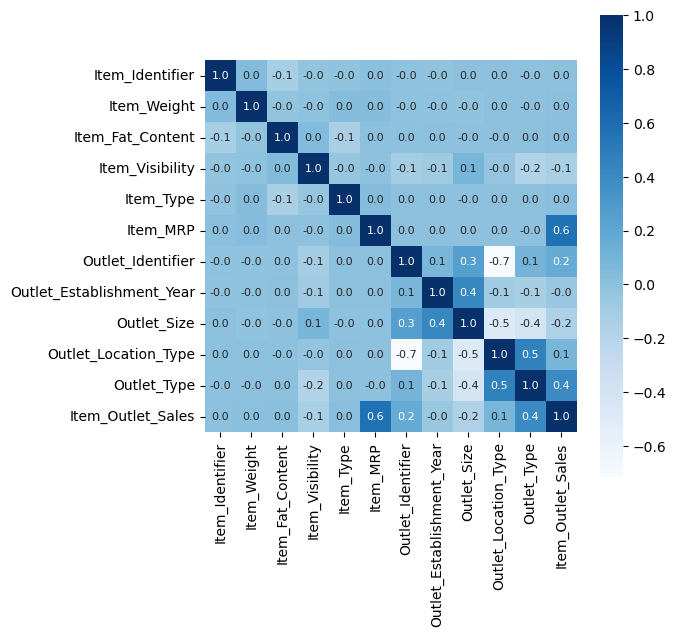

In [86]:
correlation=df.corr()
plt.figure(figsize=(6,6))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f',annot=True, annot_kws={'size':8}, cmap='Blues')

In [87]:
x_norm=StandardScaler().fit_transform(x_train)
x_norm,x_test,y_train,y_test=train_test_split(x_train,y_train,test_size=0.2,random_state=41)
print(x_norm)

[[9.5300e+02 1.5850e+01 0.0000e+00 ... 2.0000e+00 1.0000e+00 1.0000e+00]
 [1.5150e+03 1.4350e+01 0.0000e+00 ... 1.0000e+00 2.0000e+00 2.0000e+00]
 [1.3050e+03 8.1800e+00 0.0000e+00 ... 2.0000e+00 1.0000e+00 1.0000e+00]
 ...
 [1.3000e+02 7.8500e+00 0.0000e+00 ... 1.0000e+00 0.0000e+00 1.0000e+00]
 [3.4600e+02 1.2100e+01 0.0000e+00 ... 2.0000e+00 0.0000e+00 1.0000e+00]
 [3.6300e+02 1.0195e+01 1.0000e+00 ... 2.0000e+00 1.0000e+00 1.0000e+00]]


In [88]:
# max_dgree=9
# err_cv=np.zeros(max_dgree)
# err_train=np.zeros(max_dgree)
# for i in range(max_dgree):
#     pol=PolynomialFeatures(i+1,include_bias=False)
#     # normlize data training
#     x_pol=pol.fit_transform(x_norm)
#     # normlize data cv
#     x_p=pol.fit_transform(x_test)
#     # train model 
#     model=LinearRegression()
#     model.fit(x_pol,y_train)
#     # prediction 
#     y_hat_cv=model.predict(x_p)
#     y_hat=model.predict(x_pol)
#     err_cv[i]=mean_squared_error(y_test,y_hat_cv)/2
#     err_train[i]=mean_squared_error(y_train,y_hat)/2
# optimal_degree=np.argmin(err_cv)+1
# print(optimal_degree)
# print(err_train)
# print(err_cv)

In [89]:
pol=PolynomialFeatures(9,include_bias=False)
x_train=pol.fit_transform(x_norm)
x_test=pol.fit_transform(x_test)
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
error_score =r2_score(y_test, y_pred)
print("R squared Error : ", error_score*100)
for i in range(20):
    print(y_pred[i],"=>",y_test[i])

MemoryError: Unable to allocate 8.53 GiB for an array with shape (6818, 167959) and data type float64